In [1]:
%matplotlib inline


import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime as dt
import json
def pretty(obj):
    return json.dumps(obj, sort_keys=True, indent=2)
from IPython.display import display, HTML

import firvtools as firv

cwd = os.getcwd()
dataDir = cwd+"/depo/Data/"
saveDir = cwd+"/depo/Outputs/"
dataSrc = "G4swaps12082016.csv"


In [2]:

swapRates = pd.read_csv(dataDir+dataSrc, sep=",")

## set dates to index
swapRates["Dates"] = pd.to_datetime(swapRates["Dates"], infer_datetime_format=True)
swapRates.set_index("Dates", drop=True, inplace=True)

print("Done")

Done


First, load the raw data and re-save it by currency. 

In [3]:
#swapRates.info()

swapRates = swapRates.apply(pd.to_numeric, errors='coerce')

swapRates.head()

## Create a dataframe for each currency
grouped = swapRates.groupby(lambda x: x[:3], axis=1)

ccylist = []

for name, group in grouped:
    df = group.copy()
    df.dropna(how='all', inplace=True)
    print (df.head())
    df.to_pickle(dataDir+name)
    ccylist.append(name)
    print ("Saved "+name+" to Pickle.")
    

              EUR1   EUR2    EUR3    EUR4    EUR5    EUR6    EUR7  EUR10  \
Dates                                                                      
2016-12-23 -0.1930 -0.140 -0.0450  0.0000  0.1090  0.2290  0.3550  0.693   
2016-12-22 -0.1933 -0.147 -0.0830  0.0112  0.1190  0.2400  0.3690  0.714   
2016-12-21 -0.1960 -0.154 -0.0950 -0.0050  0.1045  0.2250  0.3448  0.688   
2016-12-20 -0.1990 -0.156 -0.0905 -0.0010  0.1150  0.2355  0.3650  0.709   
2016-12-19 -0.1970 -0.160 -0.1045 -0.0150  0.0925  0.2140  0.3325  0.676   

             EUR12   EUR15   EUR20   EUR25   EUR30   EUR40  
Dates                                                       
2016-12-23  0.8805  1.0590  1.1995  1.2400  1.2510  1.2445  
2016-12-22  0.8995  1.0800  1.2245  1.2660  1.2780  1.2730  
2016-12-21  0.8775  1.0555  1.1975  1.2375  1.2495  1.2420  
2016-12-20  0.8955  1.0775  1.2215  1.2645  1.2785  1.2755  
2016-12-19  0.8705  1.0525  1.1945  1.2375  1.2515  1.2425  
Saved EUR to Pickle.
             GBP1  

Saved everything to our data directory. Now, let's reload them into a dictionary for use later.

In [4]:

ccys = dict.fromkeys(ccylist)

for name in ccylist:
    ccys[name] = pd.read_pickle(dataDir+name)
    

Let's try displaying or plotting it.

In [5]:

for ccy in ccys.keys():
    ccys[ccy].dropna(how='all', inplace=True)
    print (ccys[ccy].tail())

            GBP1  GBP2  GBP3  GBP4  GBP5  GBP6  GBP7  GBP10  GBP12  GBP15  \
Dates                                                                       
1995-01-06   NaN  8.47  8.77  8.84  8.88   NaN  8.97   8.98    NaN    NaN   
1995-01-05   NaN  8.56  8.83  8.92  8.98   NaN  9.06   9.09    NaN    NaN   
1995-01-04   NaN  8.53  8.79  8.88  8.93   NaN  9.04   9.05    NaN    NaN   
1995-01-03   NaN  8.58  8.83  8.90  8.98   NaN  9.11   9.14    NaN    NaN   
1995-01-02   NaN  8.50  8.73  8.83  8.91   NaN  9.04   9.08    NaN    NaN   

            GBP20  GBP25  GBP30  GBP40  
Dates                                   
1995-01-06    NaN    NaN    NaN    NaN  
1995-01-05    NaN    NaN    NaN    NaN  
1995-01-04    NaN    NaN    NaN    NaN  
1995-01-03    NaN    NaN    NaN    NaN  
1995-01-02    NaN    NaN    NaN    NaN  
            USD1   USD2   USD3   USD4  USD5  USD6   USD7  USD10  USD12  USD15  \
Dates                                                                           
1995-01-06 

In [6]:
## Create Fwd Historicals for EUR and GBP
## Check what tenors exist.
## firv has maturity and approx PV01s.

parEur = ccys["EUR"].copy()
newCols = [x[3:]+"y" for x in parEur.columns.values]
parEur.columns = newCols

{'3y1y': 94.64, '4y': 389.3, '15y': 1295.39, '20y5y': 295.58, '5y1y': 90.84, '2y1y': 96.44, '7y3y': 253.2, '7y': 661.79, '40y': 2629.79, '25y5y': 262.28, '10y2y': 158.26, '5y': 482.24, '12y3y': 222.14, '30y10y': 442.05, '1y1y': 98.8, '4y1y': 92.94, '25y': 1925.46, '12y': 1073.25, '1y': 99.42, '20y': 1629.88, '15y5y': 334.49, '6y1y': 88.71, '10y': 914.99, '6y': 573.08, '3y': 294.66, '2y': 198.22, '30y': 2187.74}


,1y,2y,3y,4y,5y,6y,7y,10y,12y,15y,20y,25y,30y,40y
Dates,,,,,,,,,,,,,,
2016-12-23,-0.1930,-0.140,-0.0450,0.0000,0.1090,0.2290,0.3550,0.693,0.8805,1.0590,1.1995,1.2400,1.2510,1.2445
2016-12-22,-0.1933,-0.147,-0.0830,0.0112,0.1190,0.2400,0.3690,0.714,0.8995,1.0800,1.2245,1.2660,1.2780,1.2730
2016-12-21,-0.1960,-0.154,-0.0950,-0.0050,0.1045,0.2250,0.3448,0.688,0.8775,1.0555,1.1975,1.2375,1.2495,1.2420
2016-12-20,-0.1990,-0.156,-0.0905,-0.0010,0.1150,0.2355,0.3650,0.709,0.8955,1.0775,1.2215,1.2645,1.2785,1.2755
2016-12-19,-0.1970,-0.160,-0.1045,-0.0150,0.0925,0.2140,0.3325,0.676,0.8705,1.0525,1.1945,1.2375,1.2515,1.2425


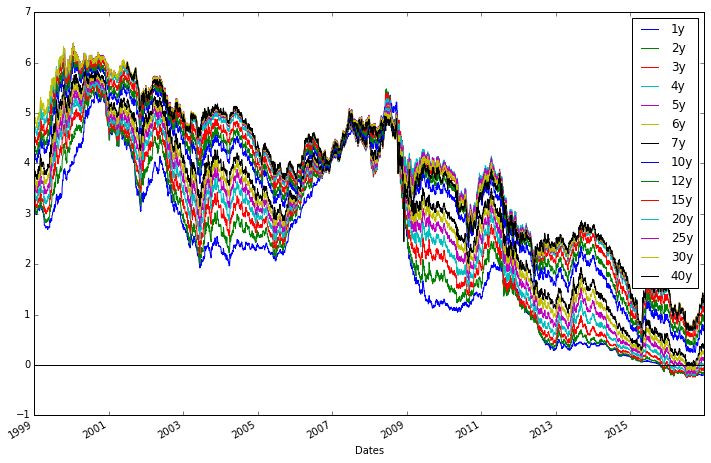

In [7]:

print (firv.pv01d)
display(parEur.head())
p1 = parEur.plot(figsize=(12,8))
p1.legend(loc="best")
p1.axhline(0, color="black")

Next let's convert them to forwards. This is approximate as the PV01s change over time.

In [9]:
fwdEur = pd.DataFrame(index=parEur.index.values)
#fwdEur["20y5y"] = 100*(parEur["25y"]*firv.pv01d["25y"]-parEur["20y"]*firv.pv01d["20y"])/(firv.pv01d["25y"] - firv.pv01d["20y"])

def calcFwdRate(r1, r2, t1, t2, pv01s=firv.pv01d):
    p1 = pv01s[t1]
    p2 = pv01s[t2]
    return (p2*r2-p1*r1)/(p2-p1)

print (calcFwdRate(129.6, 134.1, "20y", "25y"))
display(fwdEur.head())

158.91378983693076


""
2016-12-23
2016-12-22
2016-12-21
2016-12-20
2016-12-19


,1y,1y1y,2y1y,3y1y,4y1y,5y1y,6y1y,7y3y,10y2y,12y3y,15y5y,20y5y,25y5y,30y10y
2016-12-23,56.9,75.357733,96.042638,114.978085,133.655132,150.216336,165.792261,179.968331,195.802995,193.365855,173.130203,144.042744,133.515152,99.832836
2016-12-22,57.2,75.457105,98.075861,116.600782,136.730622,154.139806,170.576322,188.745274,193.583958,196.465855,174.914565,147.980154,136.515152,102.832836
2016-12-21,57.2,75.657733,98.786935,118.957523,136.492877,158.840445,169.588276,189.442314,203.415620,198.374284,178.282748,152.334407,135.461594,109.544644
2016-12-20,56.9,73.752713,94.937101,119.836961,141.419346,157.794144,172.695344,193.256019,204.615620,201.615279,179.345475,162.839111,131.712016,107.132836
2016-12-19,57.4,73.851457,98.292472,121.136961,140.124984,161.748481,173.995344,197.519257,202.531051,201.948996,182.350931,152.828737,142.749276,105.358297


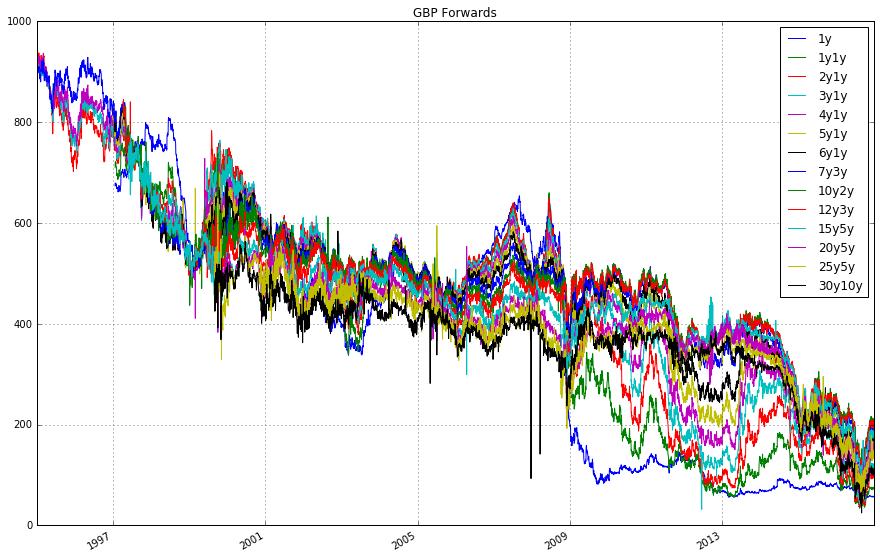

In [10]:
# we should write a function.

def computeFwds(data, pv01s = firv.pv01d):
    
    newParCols = [x[3:]+"y" for x in data.columns.values]
    par = data.copy()
    par.columns = newParCols

    fwds = pd.DataFrame(par[newParCols[0]]*100, index=par.index.values)
    parCols = par.columns.values
    allFwds = [parCols[i]+str(int(parCols[i+1][:-1])-int(parCols[i][:-1]))+"y" for i in range(len(parCols)-1)]

    for i in range(len(allFwds)):
        t1, t2 = str(parCols[i]), str(parCols[i+1])
        p1, p2 = pv01s[t1], pv01s[t2]
        r1, r2 = par[t1], par[t2]
        fwds[allfwds[i]] = 100*(r2*p2-r1*p1)/(p2-p1)
    
    return fwds


parCols = parEur.columns.values
allfwds = [parCols[i]+str(int(parCols[i+1][:-1])-int(parCols[i][:-1]))+"y" for i in range(len(parCols)-1)]

parGBP = ccys["GBP"]
fwdGBP = computeFwds(parGBP)

display(fwdGBP.head())

p2 = fwdGBP.plot(figsize=(15,10), title="GBP Forwards", grid=True)
p2.legend(loc="best")
p2.axhline(0, color="black")


Ok great, let's save the forwards now.

GBP
USD
EUR
JPY
Saved GBP forwards.
Saved USD forwards.
Saved EUR forwards.
Saved JPY forwards.


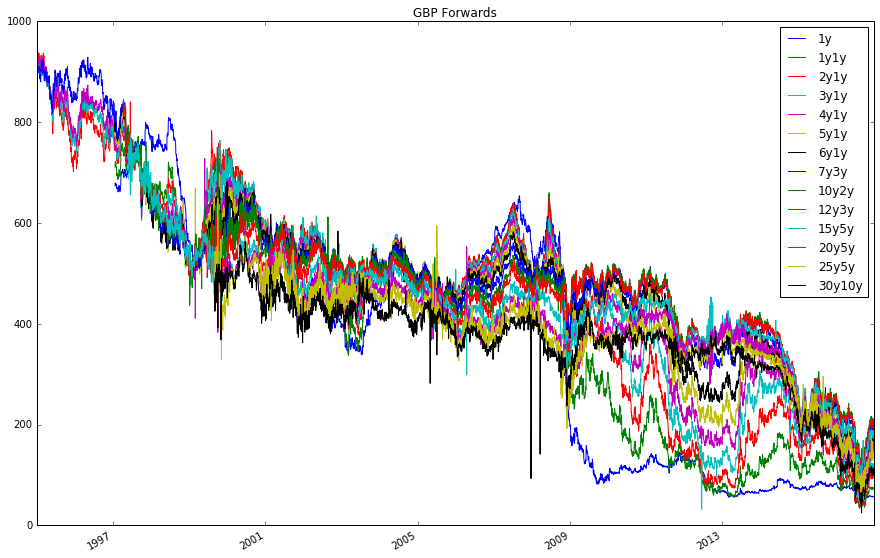

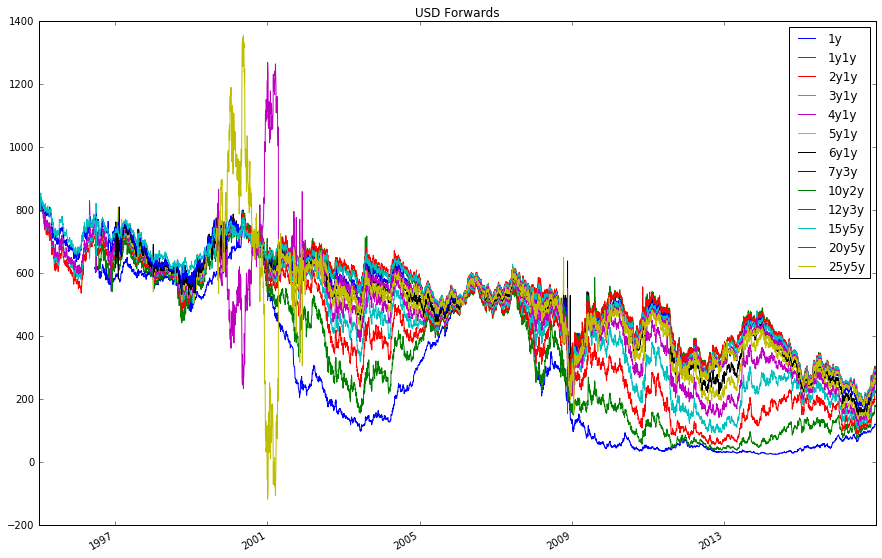

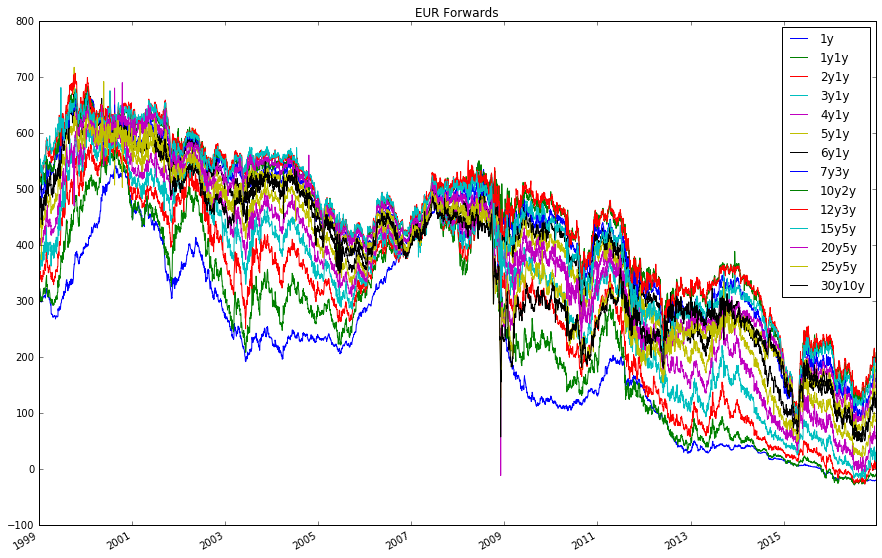

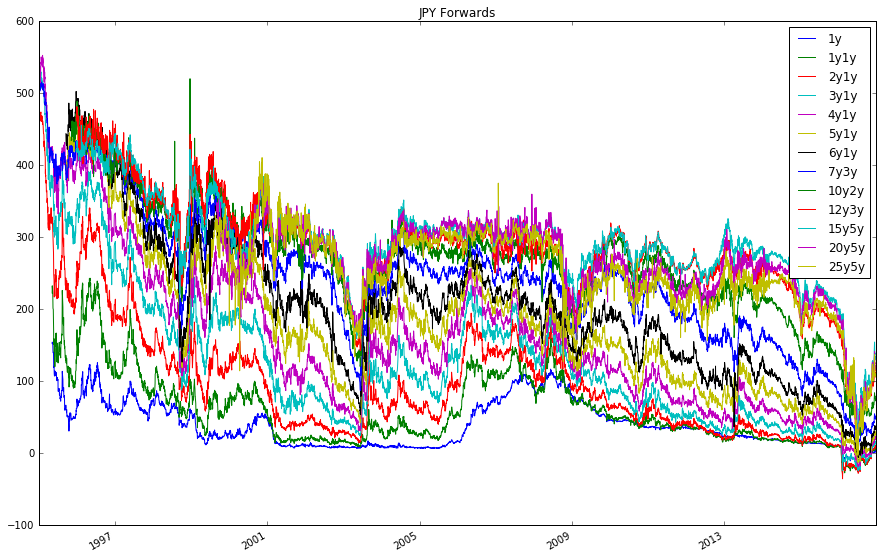

In [11]:
for ccy in ccys:
    print (ccy)

for ccy in ccys:
    fwd = computeFwds(ccys[ccy])
    fwd.plot(figsize=(15, 10), title=ccy+" Forwards")
    fwd.to_pickle(dataDir+"fwd"+ccy)

    print ("Saved "+ccy+" forwards.")